In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
 

In [2]:
data = pd.read_csv('HousingDataSet.csv')

In [3]:
df = pd.DataFrame(data)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.0,2.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check for missing values

In [8]:

# Assuming your DataFrame is named 'data'
# Check for missing values
def check_missing_values(dataframe):
    # Check for missing values in the DataFrame
    missing_values = dataframe.isnull().sum()
    
    # Filter columns that have missing values
    missing_values = missing_values[missing_values > 0]
    
    if missing_values.empty:
        print("No missing values found in the DataFrame.")
    else:
        print("Missing values found in the following columns:")
        print(missing_values)

# Check for missing values in the DataFrame
check_missing_values(data)


Missing values found in the following columns:
price            67
bedrooms         66
bathrooms        66
sqft_living      68
sqft_lot         66
floors           66
waterfront       66
view             66
condition        66
grade            66
sqft_above       66
sqft_basement    66
zipcode          66
lat              67
long             66
sqft_living15    66
sqft_lot15       66
dtype: int64


## Fill missing Value

In [10]:
# Assuming your DataFrame is named 'data'
# Function to fill missing values
def fill_missing_values(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':  # Categorical variable
            mode_value = dataframe[column].mode()[0]  # Get the mode
            dataframe[column].fillna(mode_value, inplace=True)  # Fill with mode
        else:  # Numeric variable
            mean_value = dataframe[column].mean()  # Get the mean
            dataframe[column].fillna(mean_value, inplace=True)  # Fill with mean

# Fill missing values in the DataFrame
fill_missing_values(data)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13012\881628944.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(mean_value, inplace=True)  # Fill with mean


In [11]:
import pandas as pd
from sklearn.decomposition import PCA
# Step 1: Separate input features and target variable
# Define the target variable 'price' and input features
target_variable = data['price']  # This extracts the 'price' column as the target variable
input_features = data.drop(columns=['price'])  # Drop 'price', 'id', and 'date' from features

# Step 2: Select relevant features for PCA
features_for_pca = input_features[['bedrooms', 'bathrooms']]  # Select relevant features for PCA

# Step 3: Initialize PCA to reduce dimensions
pca = PCA(n_components=1)  # Keep 1 principal component
extracted_features = pca.fit_transform(features_for_pca)  # Apply PCA to the features

# Step 4: Create a DataFrame from the extracted features
extracted_df = pd.DataFrame(extracted_features, columns=['PC1'])  # Name the principal component 'PC1'

# Step 5: Drop the original features used in PCA and append the new PCA component
input_features = input_features.drop(columns=['bedrooms', 'bathrooms'])  # Drop the original input features used in PCA
input_features = pd.concat([input_features, extracted_df], axis=1)  # Append the new principal component to the input features

# Step 6: Display the updated input features and target variable
print("Input Features:")
print(input_features.head())  # Display the first few rows of the updated input features
print("\nTarget Variable:")
print(target_variable.head())  # Display the first few rows of the target variable


Input Features:
   sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0       1180.0    5650.0     1.0         0.0   0.0        3.0    7.0   
1       2570.0    7242.0     2.0         0.0   0.0        3.0    7.0   
2        770.0   10000.0     1.0         0.0   0.0        3.0    6.0   
3       1960.0    5000.0     1.0         0.0   0.0        5.0    7.0   
4       1680.0    8080.0     1.0         0.0   0.0        3.0    8.0   

   sqft_above  sqft_basement  zipcode      lat     long  sqft_living15  \
0      1180.0            0.0  98178.0  47.5112 -122.257         1340.0   
1      2170.0          400.0  98125.0  47.7210 -122.319         1690.0   
2       770.0            0.0  98028.0  47.7379 -122.233         2720.0   
3      1050.0          910.0  98136.0  47.5208 -122.393         1360.0   
4      1680.0            0.0  98074.0  47.6168 -122.045         1800.0   

   sqft_lot15       PC1  
0      5650.0 -1.761323  
1      7639.0 -0.226207  
2      8062.0 -1.761323  
3 

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
# Step 1: Separate input features and target variable
target_variable = data['price']  # Original target variable'

# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit and transform the input features using Min-Max Scaling
input_features_scaled = pd.DataFrame(scaler.fit_transform(input_features), columns=input_features.columns)

# Step 4: Scale the target variable
target_scaled = pd.DataFrame(scaler.fit_transform(target_variable.values.reshape(-1, 1)), columns=['target_scaled'])

# Step 5: Display the scaled input features and the scaled target variable
print("Scaled Input Features:")
print(input_features_scaled.head())  # Show the first few rows of scaled input features

print("\nScaled Target Variable:")
print(target_scaled.head())  # Show the first few rows of the scaled target variable

# Now you can use both input_features_scaled and target_scaled for model training


Scaled Input Features:
   sqft_living  sqft_lot  floors  waterfront  view  condition     grade  \
0     0.067170  0.003108     0.0         0.0   0.0        0.5  0.500000   
1     0.172075  0.004072     0.4         0.0   0.0        0.5  0.500000   
2     0.036226  0.005743     0.0         0.0   0.0        0.5  0.416667   
3     0.126038  0.002714     0.0         0.0   0.0        1.0  0.500000   
4     0.104906  0.004579     0.0         0.0   0.0        0.5  0.583333   

   sqft_above  sqft_basement   zipcode       lat      long  sqft_living15  \
0    0.097588       0.000000  0.893939  0.571498  0.217608       0.161934   
1    0.206140       0.082988  0.626263  0.908959  0.166113       0.222165   
2    0.052632       0.000000  0.136364  0.936143  0.237542       0.399415   
3    0.083333       0.188797  0.681818  0.586939  0.104651       0.165376   
4    0.152412       0.000000  0.368687  0.741354  0.393688       0.241094   

   sqft_lot15       PC1  
0    0.005742  0.078811  
1    0.0080

## linear

In [23]:

# Assuming input_features_scaled and target_scaled are already defined and preprocessed
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features_scaled, target_scaled, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model using various regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Function to predict house price using real data input
def predict_house_price(input_values):
    """
    This function takes in a list of input feature values and returns the predicted house price.
    input_values: A list of feature values in the same order as the input_features list.
    """
    # Create DataFrame from input values with appropriate column names
    input_data = pd.DataFrame([input_values], columns=input_features.columns)  # Ensure correct column names
    predicted_price_scaled = linear_model.predict(input_data)  # Predict using the Linear Regression model
    
    # Inverse transform the predicted price to get it back to original scale
    predicted_price_actual = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    return predicted_price_actual

# Example: Predict house price for a new input record
new_input_values = [0.17207547169811324, 0.004071868910293493, 0.4, 0.0, 0.0, 0.5, 
                    0.49999999999999994, 0.206140350877193, 0.08298755186721991, 
                    0.44347826086956843, 0.9880893300248139, 0.6262626262626441, 
                    0.9089593051310914, 0.1661129568106361, 0.22216485974875239, 
                    ]

predicted_price = predict_house_price(new_input_values)
print(f"Predicted House Price: ${predicted_price:2f}")


Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
Mean Absolute Error (MAE): 0.02
R² Score: 0.69
Mean Absolute Percentage Error (MAPE): 36.06%
Predicted House Price: $508982.074483


In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming input_features_scaled is a DataFrame and target_scaled is a NumPy array
# Convert target_scaled to a DataFrame
target_scaled_df = pd.DataFrame(target_scaled, columns=['price'])  # Adjust the column name as needed

# Merging input_features and target_scaled_df
merged_df = pd.concat([input_features_scaled.reset_index(drop=True), target_scaled_df.reset_index(drop=True)], axis=1)

# Display the merged DataFrame
#print(merged_df.iloc[0])  # to print record 0

# Get the specific row
row_values = merged_df.iloc[3]

# Print the values separated by commas
print(', '.join(map(str, row_values)))


0.12603773584905661, 0.002713771603408933, 0.0, 0.0, 0.0, 1.0, 0.49999999999999994, 0.08333333333333333, 0.1887966804979253, 0.681818181818187, 0.5869390381212867, 0.1046511627907023, 0.16537601101359495, 0.004995698116935406, 0.17798828376842712, nan


In [26]:
new_input_values = [0.44347826086956843, 0.9880893300248139, 0.6262626262626441, 0.9089593051310914, 0.1661129568106361, 0.22216485974875239, 0.008027118519463005, 0.15420023014959724, 0.5565217391304348, 0.1335340522458481, 0.0, 0.0, 0.0, 1.0, 0.0]
predicted_price = predict_house_price(new_input_values)
print(f"Predicted House Price: ${predicted_price:.2f}")
print("Actual Price of the House is = ",538000.0)

Predicted House Price: $806768.83
Actual Price of the House is =  538000.0


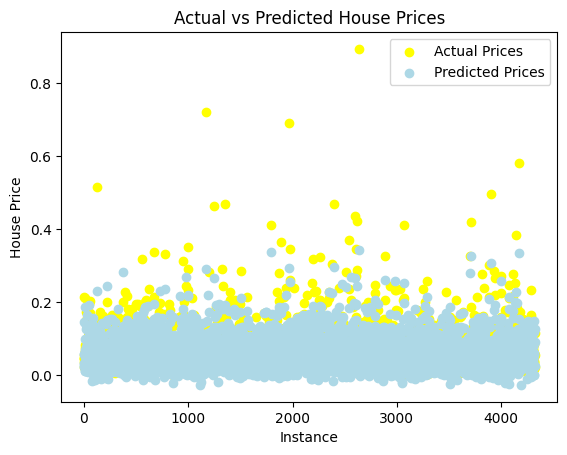

In [29]:
import matplotlib.pyplot as plt

# Visualize the actual vs predicted house prices for all instances
plt.scatter(range(len(y_test)), y_test, color='yellow', label='Actual Prices')  # Actual prices
plt.scatter(range(len(y_test)), y_pred, color='lightblue', label='Predicted Prices')  # Predicted prices

plt.title('Actual vs Predicted House Prices')
plt.xlabel('Instance')
plt.ylabel('House Price')
plt.legend()
plt.show()


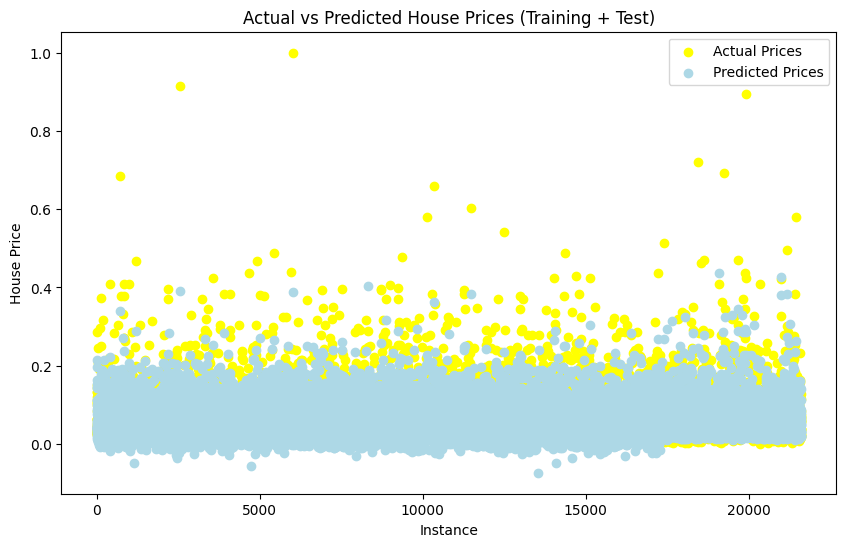

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the training data as well
y_train_pred = linear_model.predict(X_train)

# Combine actual and predicted values from both training and test sets
y_actual = np.concatenate([y_train, y_test])
y_predicted = np.concatenate([y_train_pred, y_pred])

# Create an index range for the total data (train + test)
instances = np.arange(len(y_actual))

# Visualize the actual vs predicted house prices for both training and test sets
plt.figure(figsize=(10, 6))
plt.scatter(instances, y_actual, color='yellow', label='Actual Prices')  # Actual prices
plt.scatter(instances, y_predicted, color='lightblue', label='Predicted Prices')  # Predicted prices

plt.title('Actual vs Predicted House Prices (Training + Test)')
plt.xlabel('Instance')
plt.ylabel('House Price')
plt.legend()
plt.show()


## DTR

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming input_features_scaled and target_scaled are already defined and preprocessed
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features_scaled, target_scaled, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model using various regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Function to predict house price using real data input
def predict_house_price(input_values):
    """
    This function takes in a list of input feature values and returns the predicted house price.
    input_values: A list of feature values in the same order as the input_features list.
    """
    # Create DataFrame from input values with appropriate column names
    input_data = pd.DataFrame([input_values], columns=input_features.columns)  # Ensure correct column names
    predicted_price_scaled = decision_tree_model.predict(input_data)  # Predict using the Decision Tree model
    
    # Inverse transform the predicted price to get it back to original scale
    predicted_price_actual = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    return predicted_price_actual

# Example: Predict house price for a new input record
new_input_values = [0.17207547169811324, 0.004071868910293493, 0.4, 0.0, 0.0, 0.5, 
                    0.49999999999999994, 0.206140350877193, 0.08298755186721991, 
                    0.44347826086956843, 0.9880893300248139, 0.6262626262626441, 
                    0.9089593051310914, 0.1661129568106361, 0.22216485974875239, 
                   ]

predicted_price = predict_house_price(new_input_values)
print(f"Predicted House Price: ${predicted_price:.2f}")


Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
Mean Absolute Error (MAE): 0.01
R² Score: 0.76
Mean Absolute Percentage Error (MAPE): 105.82%
Predicted House Price: $589900.00


In [38]:
new_input_values = [0.44347826086956843, 0.9880893300248139, 0.6262626262626441, 0.9089593051310914, 0.1661129568106361, 0.22216485974875239, 0.008027118519463005, 0.15420023014959724, 0.5565217391304348, 0.1335340522458481, 0.0, 0.0, 0.0, 1.0, 0.0]
predicted_price = predict_house_price(new_input_values)
print(f"Predicted House Price: ${predicted_price:.2f}")
print("Actual Price of the House is = ",538000.0)

Predicted House Price: $487000.00
Actual Price of the House is =  538000.0


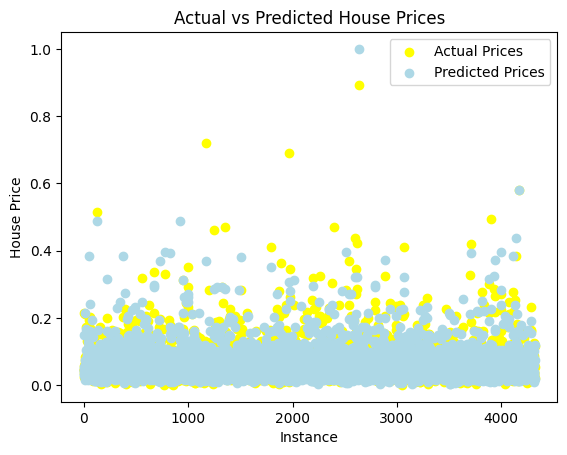

In [39]:
import matplotlib.pyplot as plt

# Visualize the actual vs predicted house prices for all instances
plt.scatter(range(len(y_test)), y_test, color='yellow', label='Actual Prices')  # Actual prices
plt.scatter(range(len(y_test)), y_pred, color='lightblue', label='Predicted Prices')  # Predicted prices

plt.title('Actual vs Predicted House Prices')
plt.xlabel('Instance')
plt.ylabel('House Price')
plt.legend()
plt.show()


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming input_features_scaled and target_scaled are already defined and preprocessed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features_scaled, target_scaled, test_size=0.2, random_state=42)

# Set the polynomial degree
degree = 2  # You can change this value to try different polynomial degrees

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
polynomial_model = LinearRegression()

# Train the model
polynomial_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = polynomial_model.predict(X_test_poly)

# Evaluate the model using various regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Function to predict house price using real data input
def predict_house_price(input_values):
    """
    This function takes in a list of input feature values and returns the predicted house price.
    input_values: A list of feature values in the same order as the input_features list.
    """
    # Create DataFrame from input values with appropriate column names
    input_data = pd.DataFrame([input_values], columns=input_features.columns)  # Ensure correct column names
    predicted_price_scaled = knn_model.predict(input_data)  # Predict using the KNN model
    
    # Inverse transform the predicted price to get it back to original scale
    predicted_price_actual = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    return predicted_price_actual

# Example: Predict house price for a new input record
new_input_values = [0.17207547169811324, 0.004071868910293493, 0.4, 0.0, 0.0, 0.5, 
                    0.49999999999999994, 0.206140350877193, 0.08298755186721991, 
                    0.44347826086956843, 0.9880893300248139, 0.6262626262626441, 
                    0.9089593051310914, 0.1661129568106361, 0.22216485974875239, 
                   ]

predicted_price = predict_house_price(new_input_values)
print(f"Predicted House Price: ${predicted_price:.2f}")

Mean Squared Error (MSE): 817253410.28
Root Mean Squared Error (RMSE): 28587.64
Mean Absolute Error (MAE): 434.86
R² Score: -303385781826.84
Mean Absolute Percentage Error (MAPE): 808738.60%
Predicted House Price: $882372.22
